# Load Models & Modules

In [3]:
%load_ext autoreload
%autoreload 2

In [ ]:
# Future print function
from __future__ import print_function

# Load modules/models from EVA course
!git clone https://github.com/phaninandula -q --quiet
!mv ERA-Session10/*.py .
#!rm -rf ERA1
print("Loaded Modules and Models")

# Installing latest Albumentation library
!pip install -U git+https://github.com/albu/albumentations -q --quiet

# For inline matplotlib plotting
%matplotlib inline

# Loading train and test data with transforms and loader functions

In [4]:
from data_loader import *

# Loading test and train data & dataloader
cifar10 = dataset_cifar10(batch_size=512)

# Train dataloader
trainloader = cifar10.loader(train_flag=True)

# Test dataloader
testloader = cifar10.loader(train_flag=False)

classes = cifar10.classes

CUDA availability ? True


100%|██████████| 170498071/170498071 [00:13<00:00, 13012134.67it/s]


Extracting ./Data/cifar-10-python.tar.gz to ./Data
Files already downloaded and verified


In [5]:
len(trainloader),len(testloader)

(98, 20)

In [6]:
98*512, 20*512

(50176, 10240)

In [7]:
50176+10240

60416

# Exploratory Data Analysis

## Summary Statistics

In [8]:
cifar10.data_summary_stats()

Files already downloaded and verified
Files already downloaded and verified
Train dataset shape : (50000, 32, 32, 3)
Test dataset shape : (10000, 32, 32, 3)
Total dataset shape : (60000, 32, 32, 3)
[0.49186878 0.48265391 0.44717728]
[0.24697121 0.24338894 0.26159259]


## Plotting sample images

Files already downloaded and verified


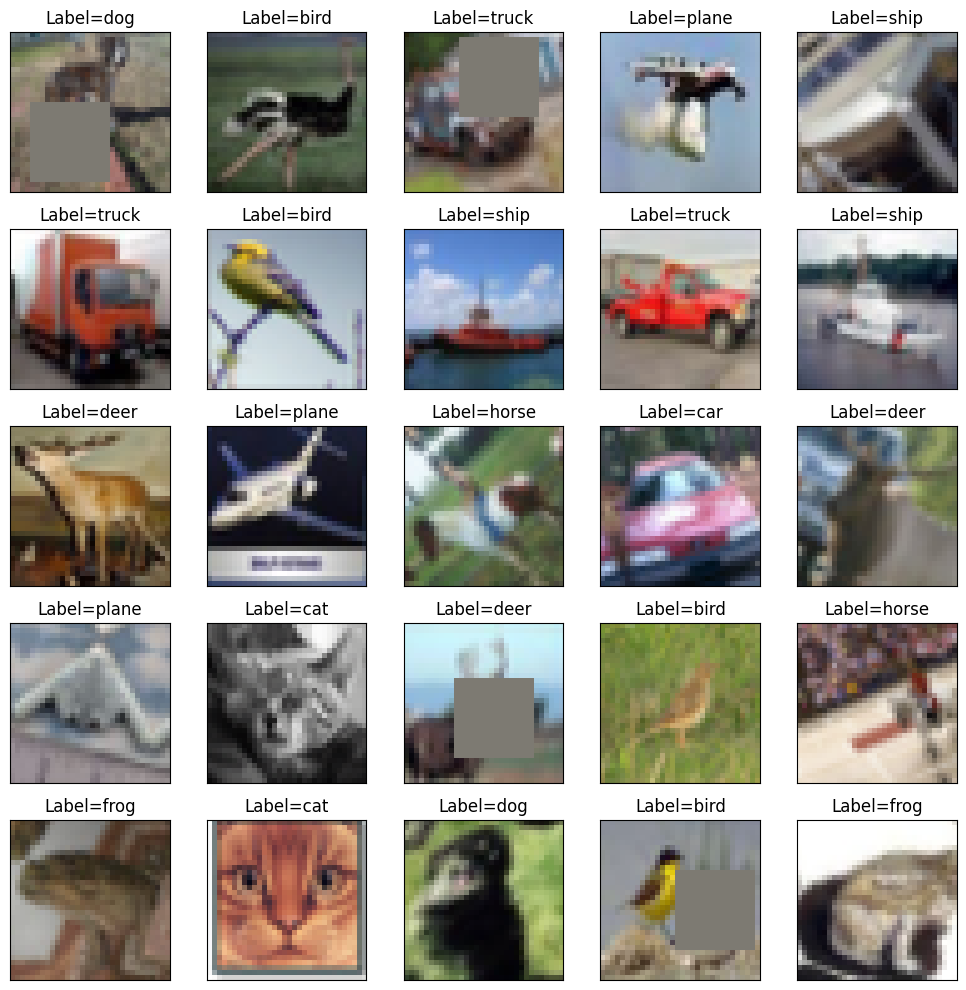

In [9]:
cifar10.sample_pictures(train_flag=True)

## Model

In [10]:
from model import *

# Loading Custom Model
net = Net()

# Using cuda if available
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)

# Sending network to device
net = net.to(device)

cuda


## Model Summary

In [11]:
!pip install torchsummary
from torchsummary import summary

# Model Summary
summary(net, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
              ReLU-3           [-1, 64, 32, 32]               0
            Conv2d-4          [-1, 128, 32, 32]          73,728
         MaxPool2d-5          [-1, 128, 16, 16]               0
       BatchNorm2d-6          [-1, 128, 16, 16]             256
              ReLU-7          [-1, 128, 16, 16]               0
                 X-8          [-1, 128, 16, 16]               0
            Conv2d-9          [-1, 128, 16, 16]         147,456
      BatchNorm2d-10          [-1, 128, 16, 16]             256
             ReLU-11          [-1, 128, 16, 16]               0
           Conv2d-12          [-1, 128, 16, 16]         147,456
      BatchNorm2d-13          [-1, 128, 16, 16]             256
             ReLU-14          [-1, 128,

## Define a Loss function and optimizer

In [26]:
import torch.optim as optim
import torch.nn as nn
from torch.optim.lr_scheduler import StepLR

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=1) #, momentum=0.85)
#scheduler = StepLR(optimizer, step_size=6, gamma=0.2)
scheduler = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr=0.01, steps_per_epoch=len(trainloader),
                                                epochs=24,pct_start=500/2400,
                                                anneal_strategy='linear')

In [2]:
500/2400

0.20833333333333334

In [7]:
len(trainloader)

98

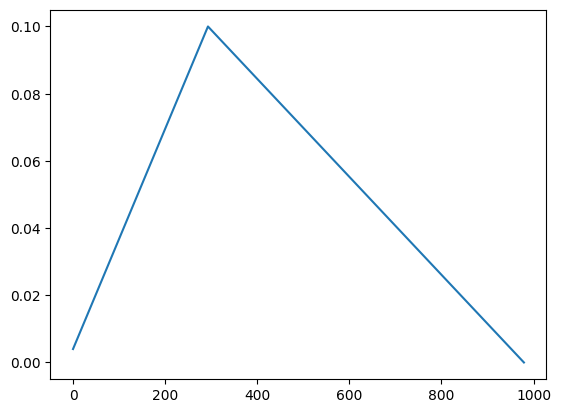

In [11]:
model = torch.nn.Linear(2,1)
optimizer = torch.optim.SGD(model.parameters(),lr=0.1)
scheduler = torch.optim.lr_scheduler.OneCycleLR(optimizer,max_lr=0.1,steps_per_epoch=len(trainloader),
                                                epochs=10,anneal_strategy='linear')
# default pc_start = 0.3 thats the reason we see the lr increased till 300 iterations and came down.
# Total number of iterations = num_epochs (10) * number of steps per epoch (50000 (total number of images in training)/512 (batch_size)) = 1000
lrs = []

for epoch in range(10):
  for batch in trainloader:
    optimizer.step()
    lrs.append(optimizer.param_groups[0]['lr'])
    scheduler.step()

import matplotlib.pyplot as plt

plt.plot(lrs)

## Training & Testing

Epoch: 0,Loss=2.38 Batch_id=97 Accuracy=10.00: 100%|██████████| 98/98 [00:20<00:00,  4.73it/s]


Test set: Average loss: 0.0047, Accuracy: 1000/10000 (10.00%)



Epoch: 1,Loss=2.36 Batch_id=97 Accuracy=10.00: 100%|██████████| 98/98 [00:20<00:00,  4.82it/s]


Test set: Average loss: 0.0047, Accuracy: 1000/10000 (10.00%)



Epoch: 2,Loss=2.37 Batch_id=97 Accuracy=10.00: 100%|██████████| 98/98 [00:20<00:00,  4.75it/s]


Test set: Average loss: 0.0047, Accuracy: 1000/10000 (10.00%)



Epoch: 3,Loss=2.38 Batch_id=97 Accuracy=10.00: 100%|██████████| 98/98 [00:20<00:00,  4.72it/s]


Test set: Average loss: 0.0047, Accuracy: 1000/10000 (10.00%)



Epoch: 4,Loss=2.40 Batch_id=97 Accuracy=10.00: 100%|██████████| 98/98 [00:21<00:00,  4.56it/s]


Test set: Average loss: 0.0047, Accuracy: 1000/10000 (10.00%)



Epoch: 5,Loss=2.35 Batch_id=97 Accuracy=10.00: 100%|██████████| 98/98 [00:20<00:00,  4.82it/s]


Test set: Average loss: 0.0047, Accuracy: 1000/10000 (10.00%)



Epoch: 6,Loss=2.36 Batch_id=97 Accuracy=10.00: 100%|██████████| 98/98 [00:20<00:00,  4.89it/s]


Test set: Average loss: 0.0047, Accuracy: 1000/10000 (10.00%)



Epoch: 7,Loss=2.35 Batch_id=97 Accuracy=10.00: 100%|██████████| 98/98 [00:20<00:00,  4.73it/s]


Test set: Average loss: 0.0047, Accuracy: 1000/10000 (10.00%)



Epoch: 8,Loss=2.37 Batch_id=97 Accuracy=10.00: 100%|██████████| 98/98 [00:20<00:00,  4.68it/s]


Test set: Average loss: 0.0047, Accuracy: 1000/10000 (10.00%)



Epoch: 9,Loss=2.37 Batch_id=97 Accuracy=10.00: 100%|██████████| 98/98 [00:21<00:00,  4.63it/s]


Test set: Average loss: 0.0047, Accuracy: 1000/10000 (10.00%)



Epoch: 10,Loss=2.36 Batch_id=97 Accuracy=10.00: 100%|██████████| 98/98 [00:21<00:00,  4.59it/s]


Test set: Average loss: 0.0047, Accuracy: 1000/10000 (10.00%)



Epoch: 11,Loss=2.35 Batch_id=97 Accuracy=10.00: 100%|██████████| 98/98 [00:20<00:00,  4.82it/s]


Test set: Average loss: 0.0047, Accuracy: 1000/10000 (10.00%)



Epoch: 12,Loss=2.36 Batch_id=97 Accuracy=10.00: 100%|██████████| 98/98 [00:21<00:00,  4.60it/s]


Test set: Average loss: 0.0047, Accuracy: 1000/10000 (10.00%)



Epoch: 13,Loss=2.34 Batch_id=97 Accuracy=10.00: 100%|██████████| 98/98 [00:20<00:00,  4.68it/s]


Test set: Average loss: 0.0047, Accuracy: 1000/10000 (10.00%)



Epoch: 14,Loss=2.38 Batch_id=97 Accuracy=10.00: 100%|██████████| 98/98 [00:19<00:00,  4.93it/s]


Test set: Average loss: 0.0047, Accuracy: 1000/10000 (10.00%)



Epoch: 15,Loss=2.35 Batch_id=97 Accuracy=10.00: 100%|██████████| 98/98 [00:20<00:00,  4.89it/s]


Test set: Average loss: 0.0047, Accuracy: 1000/10000 (10.00%)



Epoch: 16,Loss=2.38 Batch_id=97 Accuracy=10.00: 100%|██████████| 98/98 [00:21<00:00,  4.61it/s]


Test set: Average loss: 0.0047, Accuracy: 1000/10000 (10.00%)



Epoch: 17,Loss=2.37 Batch_id=97 Accuracy=10.00: 100%|██████████| 98/98 [00:21<00:00,  4.61it/s]


Test set: Average loss: 0.0047, Accuracy: 1000/10000 (10.00%)



Epoch: 18,Loss=2.38 Batch_id=97 Accuracy=10.00: 100%|██████████| 98/98 [00:21<00:00,  4.61it/s]


Test set: Average loss: 0.0047, Accuracy: 1000/10000 (10.00%)



Epoch: 19,Loss=2.36 Batch_id=97 Accuracy=10.00: 100%|██████████| 98/98 [00:19<00:00,  4.93it/s]


Test set: Average loss: 0.0047, Accuracy: 1000/10000 (10.00%)



Epoch: 20,Loss=2.35 Batch_id=97 Accuracy=10.00: 100%|██████████| 98/98 [00:20<00:00,  4.71it/s]


Test set: Average loss: 0.0047, Accuracy: 1000/10000 (10.00%)



Epoch: 21,Loss=2.37 Batch_id=97 Accuracy=10.00: 100%|██████████| 98/98 [00:20<00:00,  4.73it/s]


Test set: Average loss: 0.0047, Accuracy: 1000/10000 (10.00%)



Epoch: 22,Loss=2.36 Batch_id=97 Accuracy=10.00: 100%|██████████| 98/98 [00:19<00:00,  4.92it/s]


Test set: Average loss: 0.0047, Accuracy: 1000/10000 (10.00%)



Epoch: 23,Loss=2.36 Batch_id=97 Accuracy=10.00: 100%|██████████| 98/98 [00:19<00:00,  4.91it/s]


Test set: Average loss: 0.0047, Accuracy: 1000/10000 (10.00%)

Finished Training


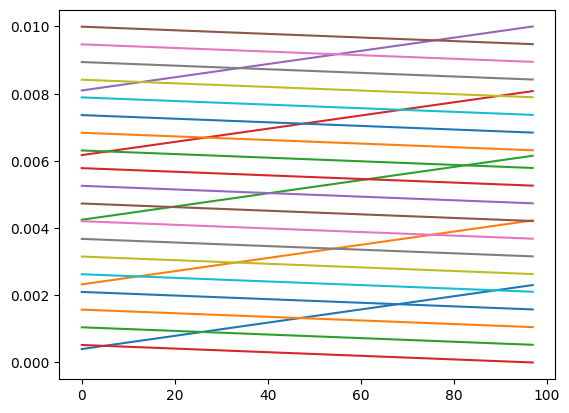

In [27]:
# Load train and test model
from main import *

train = train()
test = test()

EPOCHS= 24

for epoch in range(EPOCHS):  # loop over the dataset multiple times
  #train.execute(net, device, batch, optimizer, criterion, epoch)
  train.execute(net, device, trainloader, optimizer, scheduler, criterion, epoch)
  test.execute(net, device, testloader, criterion)

print('Finished Training')

## Display an image from the test set

In [ ]:
images, labels = cifar10.sample_pictures(train_flag=False, return_flag = True)

## Prediction of sampe test set

In [ ]:
images,labels = images.to(device),labels.to(device)
outputs = net(images)
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(5)))

## Evaluating Training Accuracy

In [ ]:
from evaluate import *
calAccuracy(net, trainloader, device)

## Evaluating Test Accuracy

In [ ]:
calAccuracy(net, testloader, device)

## Evaluating test Accuracy over different classes

In [ ]:
calClassAccuracy(net, testloader,classes, device)

## Misclassified Images

In [ ]:
from utils import plot_misclassified_images
plot_misclassified_images(net, testloader, classes, device)